# House pricing data exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset_df = pd.read_csv("raw/all.csv")
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

These columns do not represent anything or either there are full of NA or null values

In [3]:
dropped_colums = [
    "Id",
    "Alley",
    "MasVnrType",
    "FireplaceQu",
    "PoolQC",
    "Fence",
    "MiscFeature"
]

dataset_df = dataset_df.drop(dropped_colums, axis=1,
                             errors="ignore")
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Let's see how the categorical data is distributed

In [4]:
dataset_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [5]:
df_objs = dataset_df.select_dtypes(include=["O"])

for c in df_objs.columns:
    df_objs[c] = df_objs[c].astype("category")

df_cat = df_objs.select_dtypes(include=["category"])

for c in df_cat.columns:
    print(df_cat[c].value_counts())

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype:

From this information I can get ride of samples which contains just one of example of category data

In [6]:
dropping = {}

for c in df_cat.columns:
    counts = df_cat[c].value_counts().to_dict()
    targets = [target for target, value in counts.items() if value <= 1]
    if len(targets) >= 1:
        dropping[c] = targets
        print(c, targets)

Utilities ['NoSeWa']
Condition2 ['PosA', 'RRAe', 'RRAn']
RoofMatl ['ClyTile', 'Membran', 'Metal', 'Roll']
Exterior1st ['AsphShn', 'CBlock', 'ImStucc']
Exterior2nd ['CBlock', 'Other']
ExterCond ['Po']
Heating ['Floor']
HeatingQC ['Po']
Electrical ['Mix']
Functional ['Sev']


In [7]:
print(df_cat.shape)

for c, targets in dropping.items():
    df_cat = df_cat[~df_cat[c].isin(targets)].reset_index(drop=True)

print(df_cat.shape)

(1460, 37)
(1443, 37)


Dropping columns which contains just one type of category

In [8]:
dropping = []

for c in df_cat.columns:
    counts = df_cat[c].value_counts().to_dict()
    counts = {c: freq for c, freq in counts.items() if freq >= 2}
    if len(counts) <= 1:
        dropping.append(c)

dropping

['Utilities']

In [9]:
print(df_cat.shape)
df_cat = df_cat.drop(dropping, errors="ignore", axis=1).reset_index(drop=True)
print(df_cat.shape)

(1443, 37)
(1443, 36)


There are missing values in many columns and it doesn't depend on the type of the column

In [10]:
list(set(dataset_df.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [11]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.isna().any()

MSSubClass       False
LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt       True
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

Let's start to fill the missing values of columns of type float64 and int64. The missing values will be filled with the median value
using SimpleImputer

In [12]:
from sklearn.impute import SimpleImputer
import pandas as pd

df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])

si = SimpleImputer(strategy="median")

data = si.fit_transform(df_num)
columns = si.get_feature_names_out()

df_num = pd.DataFrame(data=data, columns=columns)
df_num.isna().any()

MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

Here we can notice that most of these features present a shifted normal distribution.
As far as I know it is recomended to standar the data of each features so features
that in general or that have extreamly big values is not just taken into account compare to other
features which contains smaller values.

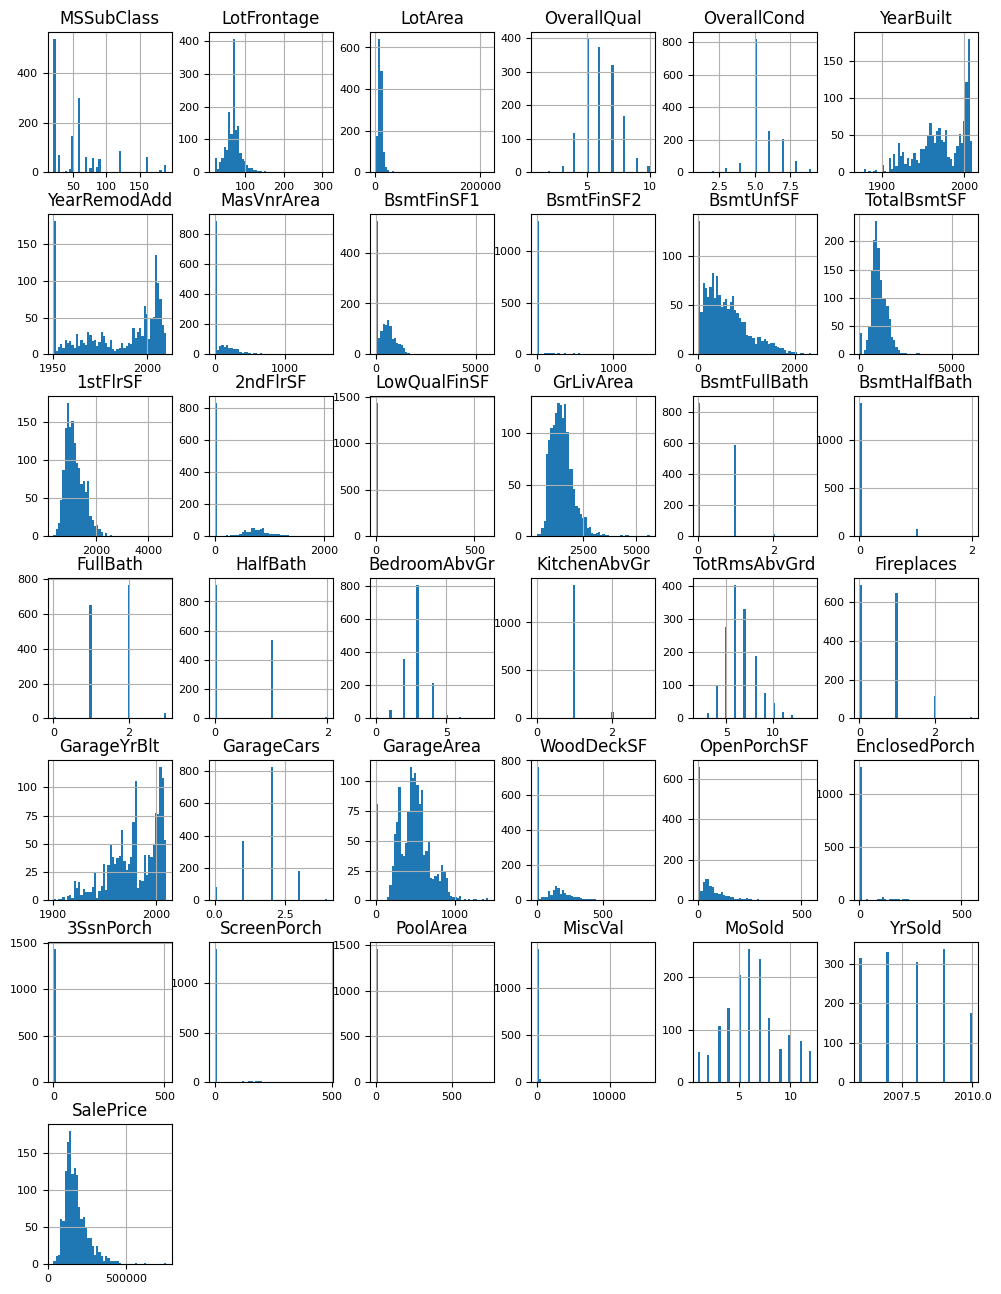

In [13]:
df_num.hist(figsize=(12, 16), bins=50, xlabelsize=8, ylabelsize=8);

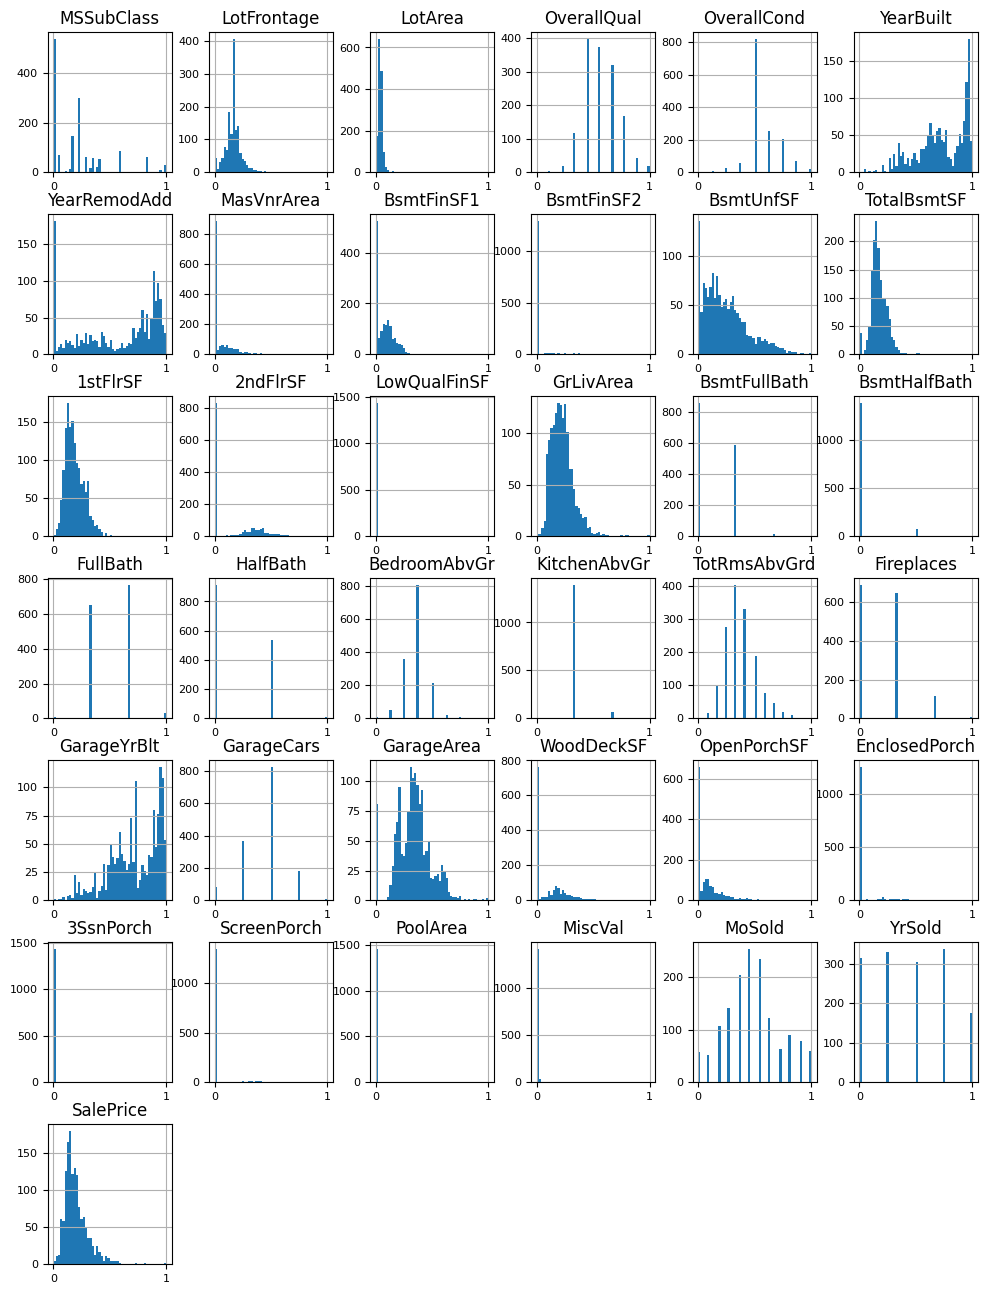

In [14]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

ss = MinMaxScaler()

data = ss.fit_transform(df_num)
columns = ss.get_feature_names_out()

pd.DataFrame(data=data, columns=columns).hist(figsize=(12, 16), bins=50, xlabelsize=8, ylabelsize=8);

In [15]:
df_num = pd.DataFrame(data=data, columns=columns)

In [16]:
df_num.isna().any()

MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

Let's do the same with objects, but we first need to transform these columns into categorical data. 
Now we can use SimpleImputer to replace missing values with the most frequent value.

In [17]:
from sklearn.impute import SimpleImputer
import pandas as pd

df_cat = dataset_df.select_dtypes(include = ['O'])

for c in df_cat.columns:
    df_cat[c] = df_cat[c].astype("category")

si = SimpleImputer(strategy="most_frequent")

data = si.fit_transform(df_cat)
columns = si.get_feature_names_out()

df_cat = pd.DataFrame(data=data, columns=columns)
df_cat.isna().any()

MSZoning         False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functional       False
GarageType       False
GarageFinish     False
GarageQual       False
GarageCond       False
PavedDrive       False
SaleType         False
SaleCondition    False
dtype: bool

The problem now is we need to codify the categorical data in numerical data.
Some of this features should be codified by ordinal distance because the order matters, but 
many of them should codify as distance, represented as a vector. As I am
not a professional about the data, I am going to codify them as normal vectorial distance using OneHotEncoder

In [18]:
df_cat.head(3)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


We can notice that the number of features had increased exponenciality

In [19]:
df_cat.shape

(1460, 37)

In [20]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
ohe.fit_transform(df_cat).shape

(1460, 230)

So good so far, the problem now is that we need to do these transformations for each dataset.
Lets create a column transformer pipeline to reuse these.

In [21]:
import pandas as pd

def preprocess_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    dataset_df = df.copy().reset_index(drop=True)

    print(f"[INFO]: Dropping columns with full of NA or Identifiers. Current dataframe shape: {dataset_df.shape}")

    dropped_colums = [
        "Id",
        "Alley",
        "MasVnrType",
        "FireplaceQu",
        "PoolQC",
        "Fence",
        "MiscFeature"
    ]

    dataset_df = dataset_df.drop(dropped_colums, axis=1,
                                errors="ignore")

    print(f"[INFO]: Dropped columns with full of NA or Identifiers. Current dataframe shape: {dataset_df.shape}")

    cat_columns = dataset_df.select_dtypes(include = ['O']).columns

    for c in cat_columns:
        dataset_df[c] = dataset_df[c].astype("category")

    return dataset_df


def preprocess_training_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    dataset_df = df.copy().reset_index(drop=True)
    dataset_df = preprocess_dataframe(dataset_df)
    cat_columns = dataset_df.select_dtypes(include = ["category"]).columns

    print(f"[INFO]: Dropping categories types with few ocurrence. Current dataframe shape: {dataset_df.shape}")
    dropping_ocurrences = {}

    for c in cat_columns:
        counts = dataset_df[c].value_counts().to_dict()
        targets = [target for target, value in counts.items() if value <= 1]
        if len(targets) >= 1:
            dropping_ocurrences[c] = targets

    for c, targets in dropping_ocurrences.items():
        dataset_df = dataset_df[~dataset_df[c].isin(targets)].reset_index(drop=True)

    print(f"[INFO]: Few ocurrences removed. Current dataframe shape: {dataset_df.shape}")


    print(f"[INFO]: Dropping columns which contains just one type of category. Current dataframe shape: {dataset_df.shape}")
    cols_to_drop = []

    for c in cat_columns:
        counts = dataset_df[c].value_counts().to_dict()
        counts = {c: count for c, count in counts.items() if count >= 2}
        if len(counts) <= 1:
            cols_to_drop.append(c)

    dataset_df = dataset_df.drop(cols_to_drop, errors="ignore", axis=1).reset_index(drop=True)

    print(f"[INFO]: Columns with just one type of categroy dropped. Current dataframe shape: {dataset_df.shape}")

    return dataset_df

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

import pandas as pd

dataset_df = pd.read_csv("raw/all.csv")
dataset_df = preprocess_training_dataframe(dataset_df)

numeric_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", MinMaxScaler()),
    ]
)

categorical_transformer = Pipeline(
    steps = [
        ("category", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(sparse_output=False)),
    ]
)

ct = ColumnTransformer([
    (
        "num",
        numeric_transformer,
        make_column_selector(dtype_include=["float64", "int64"])
    ),
    (
        "cat",
        categorical_transformer,
        make_column_selector(dtype_include=["category"])
    ),
])

data = ct.fit_transform(dataset_df)
columns = ct.get_feature_names_out()

preprocessed_df = pd.DataFrame(data=data, columns=columns)
preprocessed_df.head(3)

[INFO]: Dropping columns with full of NA or Identifiers. Current dataframe shape: (1460, 81)
[INFO]: Dropped columns with full of NA or Identifiers. Current dataframe shape: (1460, 74)
[INFO]: Dropping categories types with few ocurrence. Current dataframe shape: (1460, 74)
[INFO]: Few ocurrences removed. Current dataframe shape: (1443, 74)
[INFO]: Dropping columns which contains just one type of category. Current dataframe shape: (1443, 74)
[INFO]: Columns with just one type of categroy dropped. Current dataframe shape: (1443, 73)


,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__SaleType_ConLw,cat__SaleType_New,cat__SaleType_Oth,cat__SaleType_WD,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.312389,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.432743,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.215044,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
ct

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fecda924d90>),
                                ('cat',
                                 Pipeline(steps=[('category',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fecda924dc0>)])

In [26]:
"SalePrice" in preprocessed_df.columns

False

In [31]:
dataset_df["SalePrice"].describe()

count      1443.000000
mean     181163.576577
std       79404.944619
min       34900.000000
25%      130000.000000
50%      163500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64